In [22]:
import pandas as pd
from baseline.data import load_data

data_file = "data/reference/replica-cambridge_trips.csv"
data_df = load_data(data_file)

data_df.head()

,person_id,age,gender,employment_status,household_size,household_income,available_vehicles,industry,education,trip_purpose,start_time,primary_mode,duration_minutes,age_group,income_group
0,11970818749387655991,29,female,employed,2,347732,one,naics62,bachelors_degree,other_activity_type,15,walking,10-20,25-34,$300k+
1,10037235632858268898,28,female,employed,1,5941,zero,naics5616,bachelors_degree,shop,16,walking,0-10,25-34,Under $10k
2,3696223847047063943,20,male,employed,3,8126,zero,naics54,some_college,home,13,walking,0-10,18-24,Under $10k
3,948480481286586474,29,male,employed,2,291847,two,naics54,advanced_degree,home,21,private_auto,10-20,25-34,$200k-$300k
4,5005991725937095470,60,male,not_in_labor_force,4,105982,one,not_working,bachelors_degree,home,12,walking,10-20,55-64,$100k-$150k


In [23]:
# Remove the trailing comma to make this a proper list
primary_mode_list = ['walking', 'biking', 'auto_passenger', 'public_transit','private_auto', 'on_demand_auto','other_travel_mode']
duration_minutes_list = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60']
plot_columns = ['age_group','income_group','gender','employment_status','household_size','available_vehicles','education','trip_purpose','start_time']

/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_55220/684496516.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_55220/684496516.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_55220/684496516.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_55220/684496516.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000

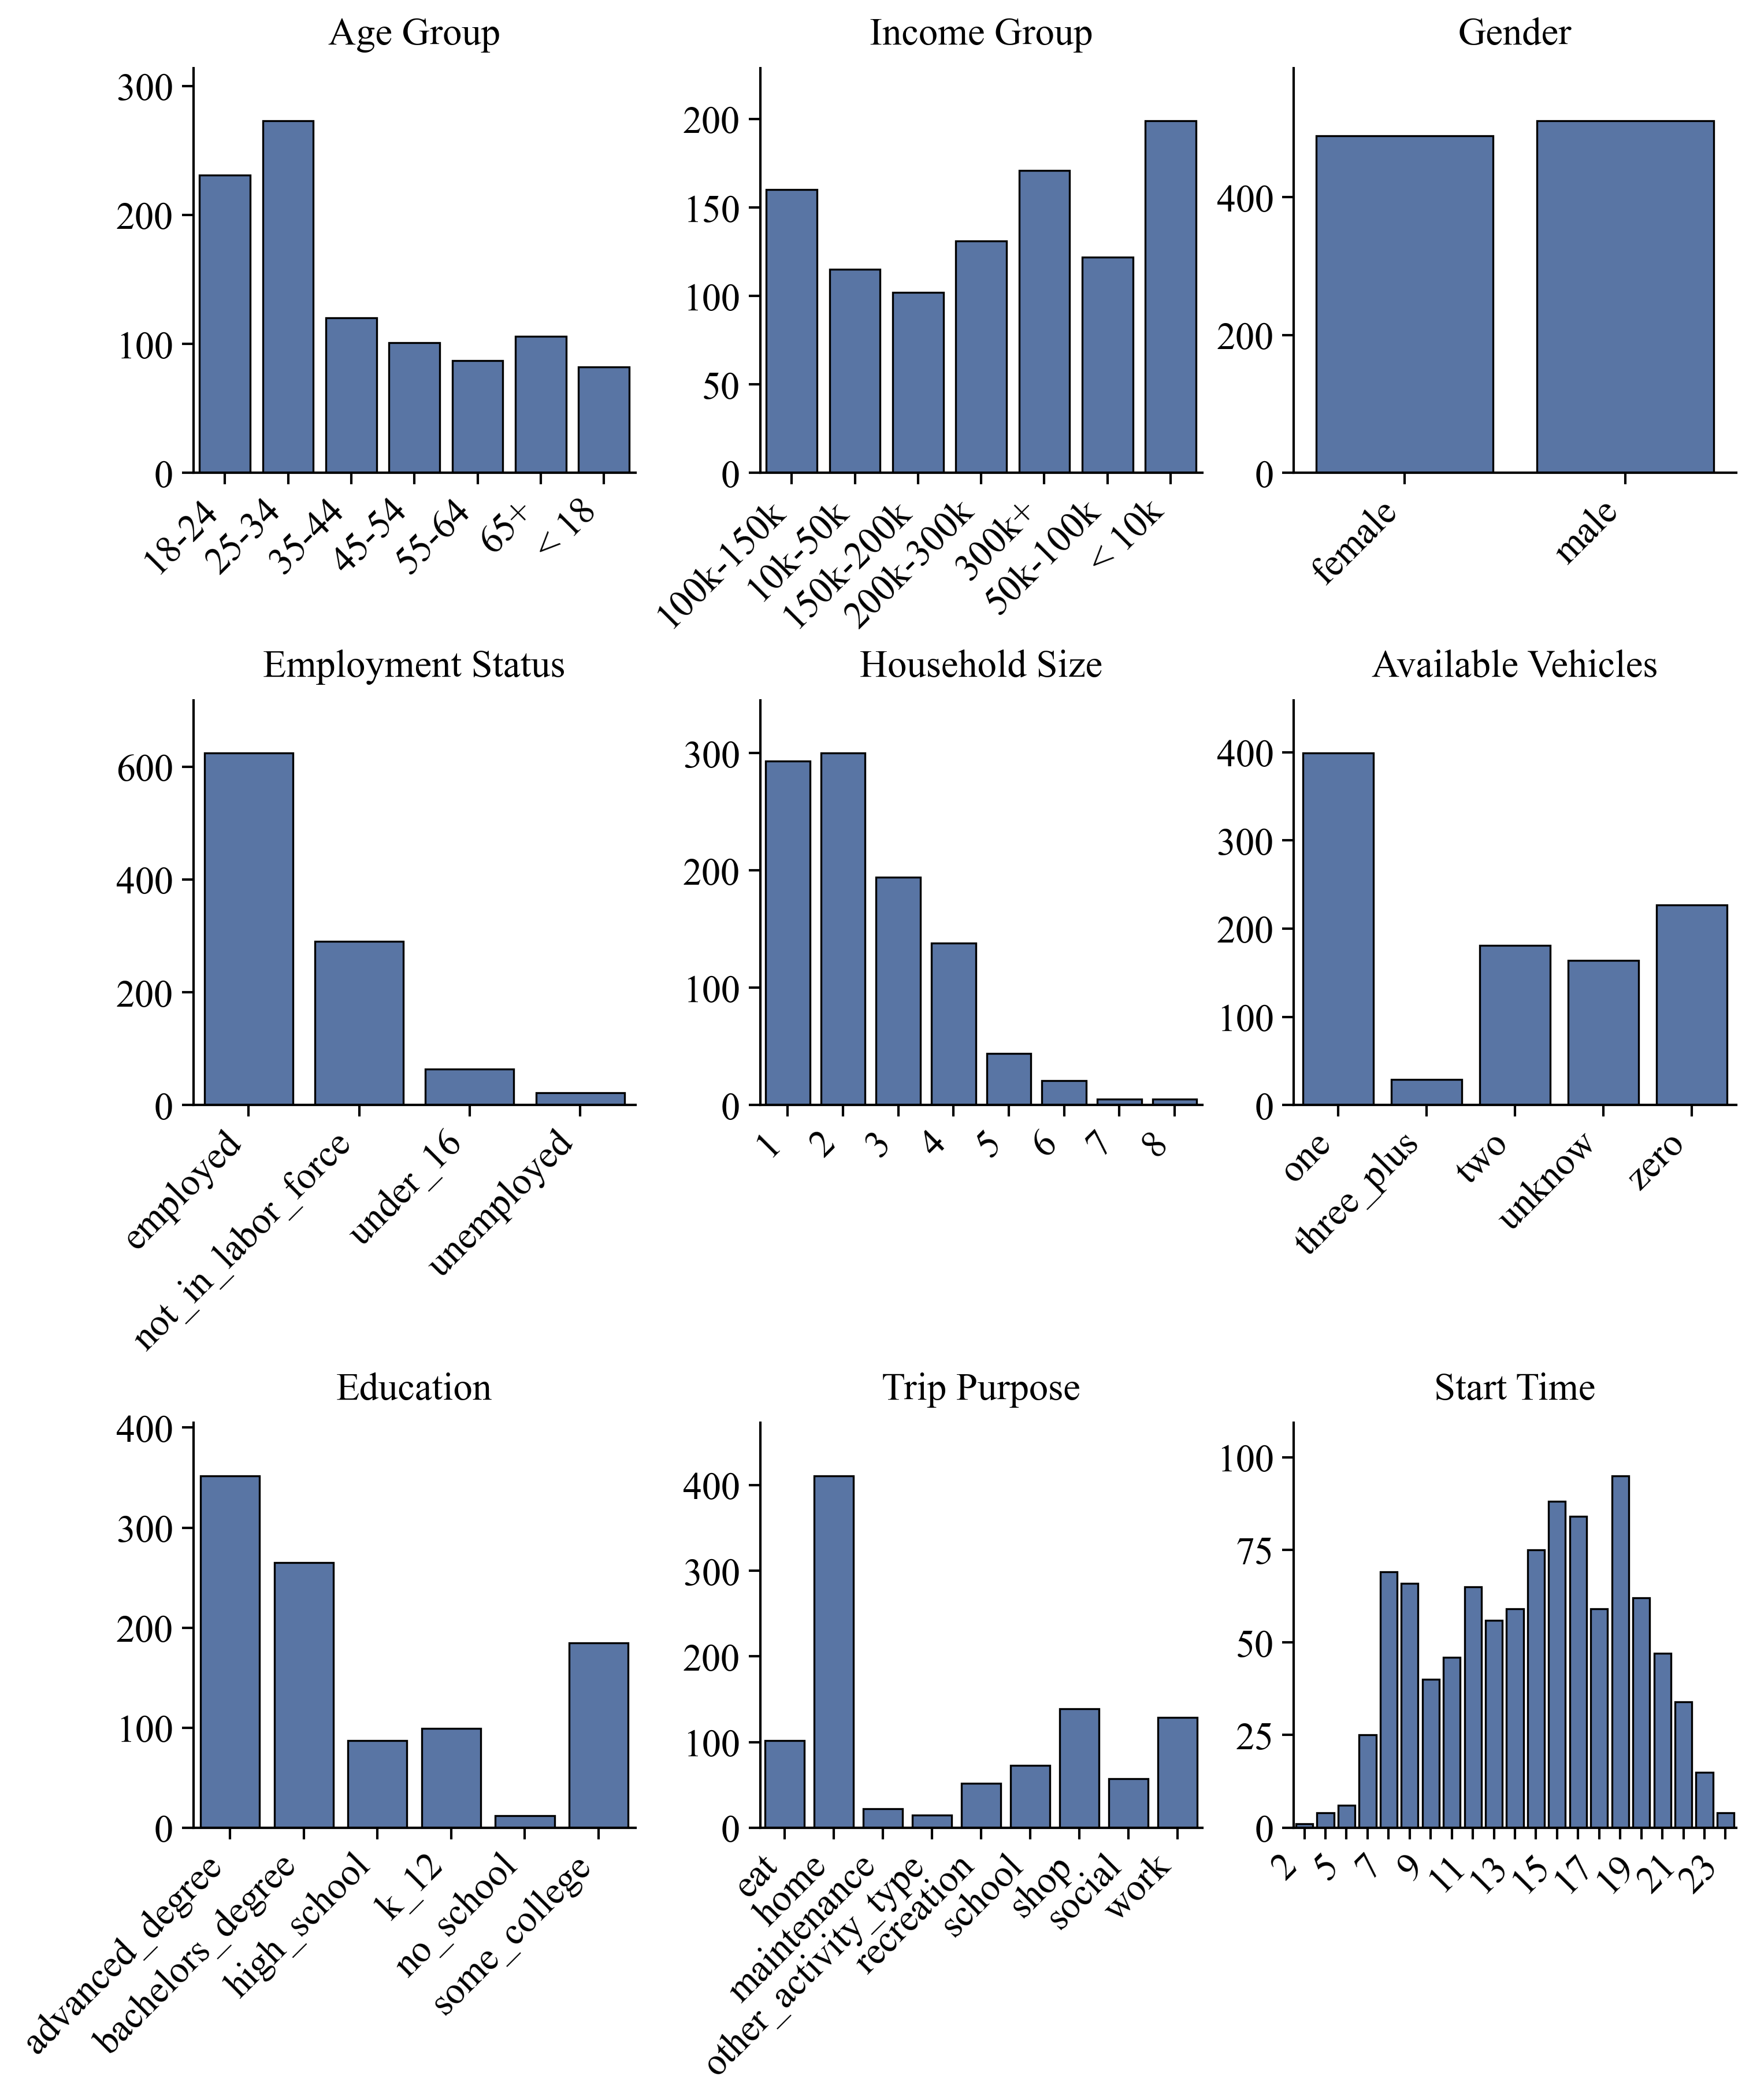

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置学术风格的图表参数
# plt.style.use('seaborn-v0_8-whitegrid')

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': False,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'figure.titlesize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True
})

sns.set_context("paper", font_scale=1.8)

# 创建图表
fig, axes = plt.subplots(3,3, figsize=(10, 12), constrained_layout=True)
axes = axes.flatten()

# 设置统一的颜色 - 选择学术风格的蓝色
UNIFIED_COLOR = '#4C72B0'  # 适度的蓝色，学术风格
# ALPHA = 0.8  # 透明度

# 为每个分类变量创建可视化
for i, col in enumerate(plot_columns[:len(axes)]):
    # 计算分布
    value_counts = data_df[col].value_counts().sort_index()
    
    # 创建条形图 - 使用统一颜色
    ax = axes[i]
    bars = sns.barplot(x=value_counts.index, y=value_counts.values, 
                       ax=ax, color=UNIFIED_COLOR,edgecolor='black',linewidth=0.8)
    
    # 添加数值标签
    # for p in bars.patches:
    #     ax.annotate(f'{int(p.get_height())}', 
    #                (p.get_x() + p.get_width() / 2., p.get_height()),
    #                ha='center', va='bottom',
    #                fontsize=10, xytext=(0, 2),
    #                textcoords='offset points')
    
    # 设置标题和标签
    ax.set_title(f'{col.replace("_", " ").title()}', pad=10, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # 旋转x轴标签
    plt.setp( ax.get_xticklabels(), rotation=45, ha='right')
    # Get the text from each label, replace "$" character, and set back
    labels = [item.get_text().replace("$", "").replace("Under","<").replace("unknown_num_vehicles","unknow") for item in ax.get_xticklabels()]
    if i == 8:
        # ax.set_xticklabels([x for i,x in enumerate(labels) if i%2==0 else ""])
        ax.set_xticklabels([x if i%2==0 else "" for i,x in enumerate(labels)])
    else:
        ax.set_xticklabels(labels)
    
    # 移除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加网格线(仅y轴方向)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    
    # 调整y轴范围
    ax.set_ylim(0, value_counts.max() * 1.15)

# 显示图表
plt.show()

In [2]:
import pandas as pd
from baseline.data import load_data

cambridge_file = "data/reference/replica-cambridge_trips.csv"
cambridge_df = load_data(cambridge_file )
cambridge_df['city'] = ['Cambridge']*len(cambridge_df)


sf_file = "data/reference/replica-sf_trips.csv"
sf_df = load_data(sf_file)
sf_df['city'] = ['San Francisco']*len(sf_df)

merged_df = pd.concat([cambridge_df,sf_df])
merged_df.head()

,person_id,age,gender,employment_status,household_size,household_income,available_vehicles,industry,education,trip_purpose,start_time,primary_mode,duration_minutes,age_group,income_group,city
0,11970818749387655991,29,female,employed,2,347732,one,naics62,bachelors_degree,other_activity_type,15,walking,10-20,25-34,$300k+,Cambridge
1,10037235632858268898,28,female,employed,1,5941,zero,naics5616,bachelors_degree,shop,16,walking,0-10,25-34,Under $10k,Cambridge
2,3696223847047063943,20,male,employed,3,8126,zero,naics54,some_college,home,13,walking,0-10,18-24,Under $10k,Cambridge
3,948480481286586474,29,male,employed,2,291847,two,naics54,advanced_degree,home,21,private_auto,10-20,25-34,$200k-$300k,Cambridge
4,5005991725937095470,60,male,not_in_labor_force,4,105982,one,not_working,bachelors_degree,home,12,walking,10-20,55-64,$100k-$150k,Cambridge


In [4]:
# Remove the trailing comma to make this a proper list
primary_mode_list = ['walking', 'biking', 'auto_passenger', 'public_transit','private_auto', 'on_demand_auto','other_travel_mode']
duration_minutes_list = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60']
plot_columns = ['age_group','income_group','gender','employment_status','household_size','available_vehicles','education','trip_purpose','start_time']
output_columns = ["primary_mode","duration_minutes"]

/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_58948/3854924225.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_58948/3854924225.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_58948/3854924225.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_58948/3854924225.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh

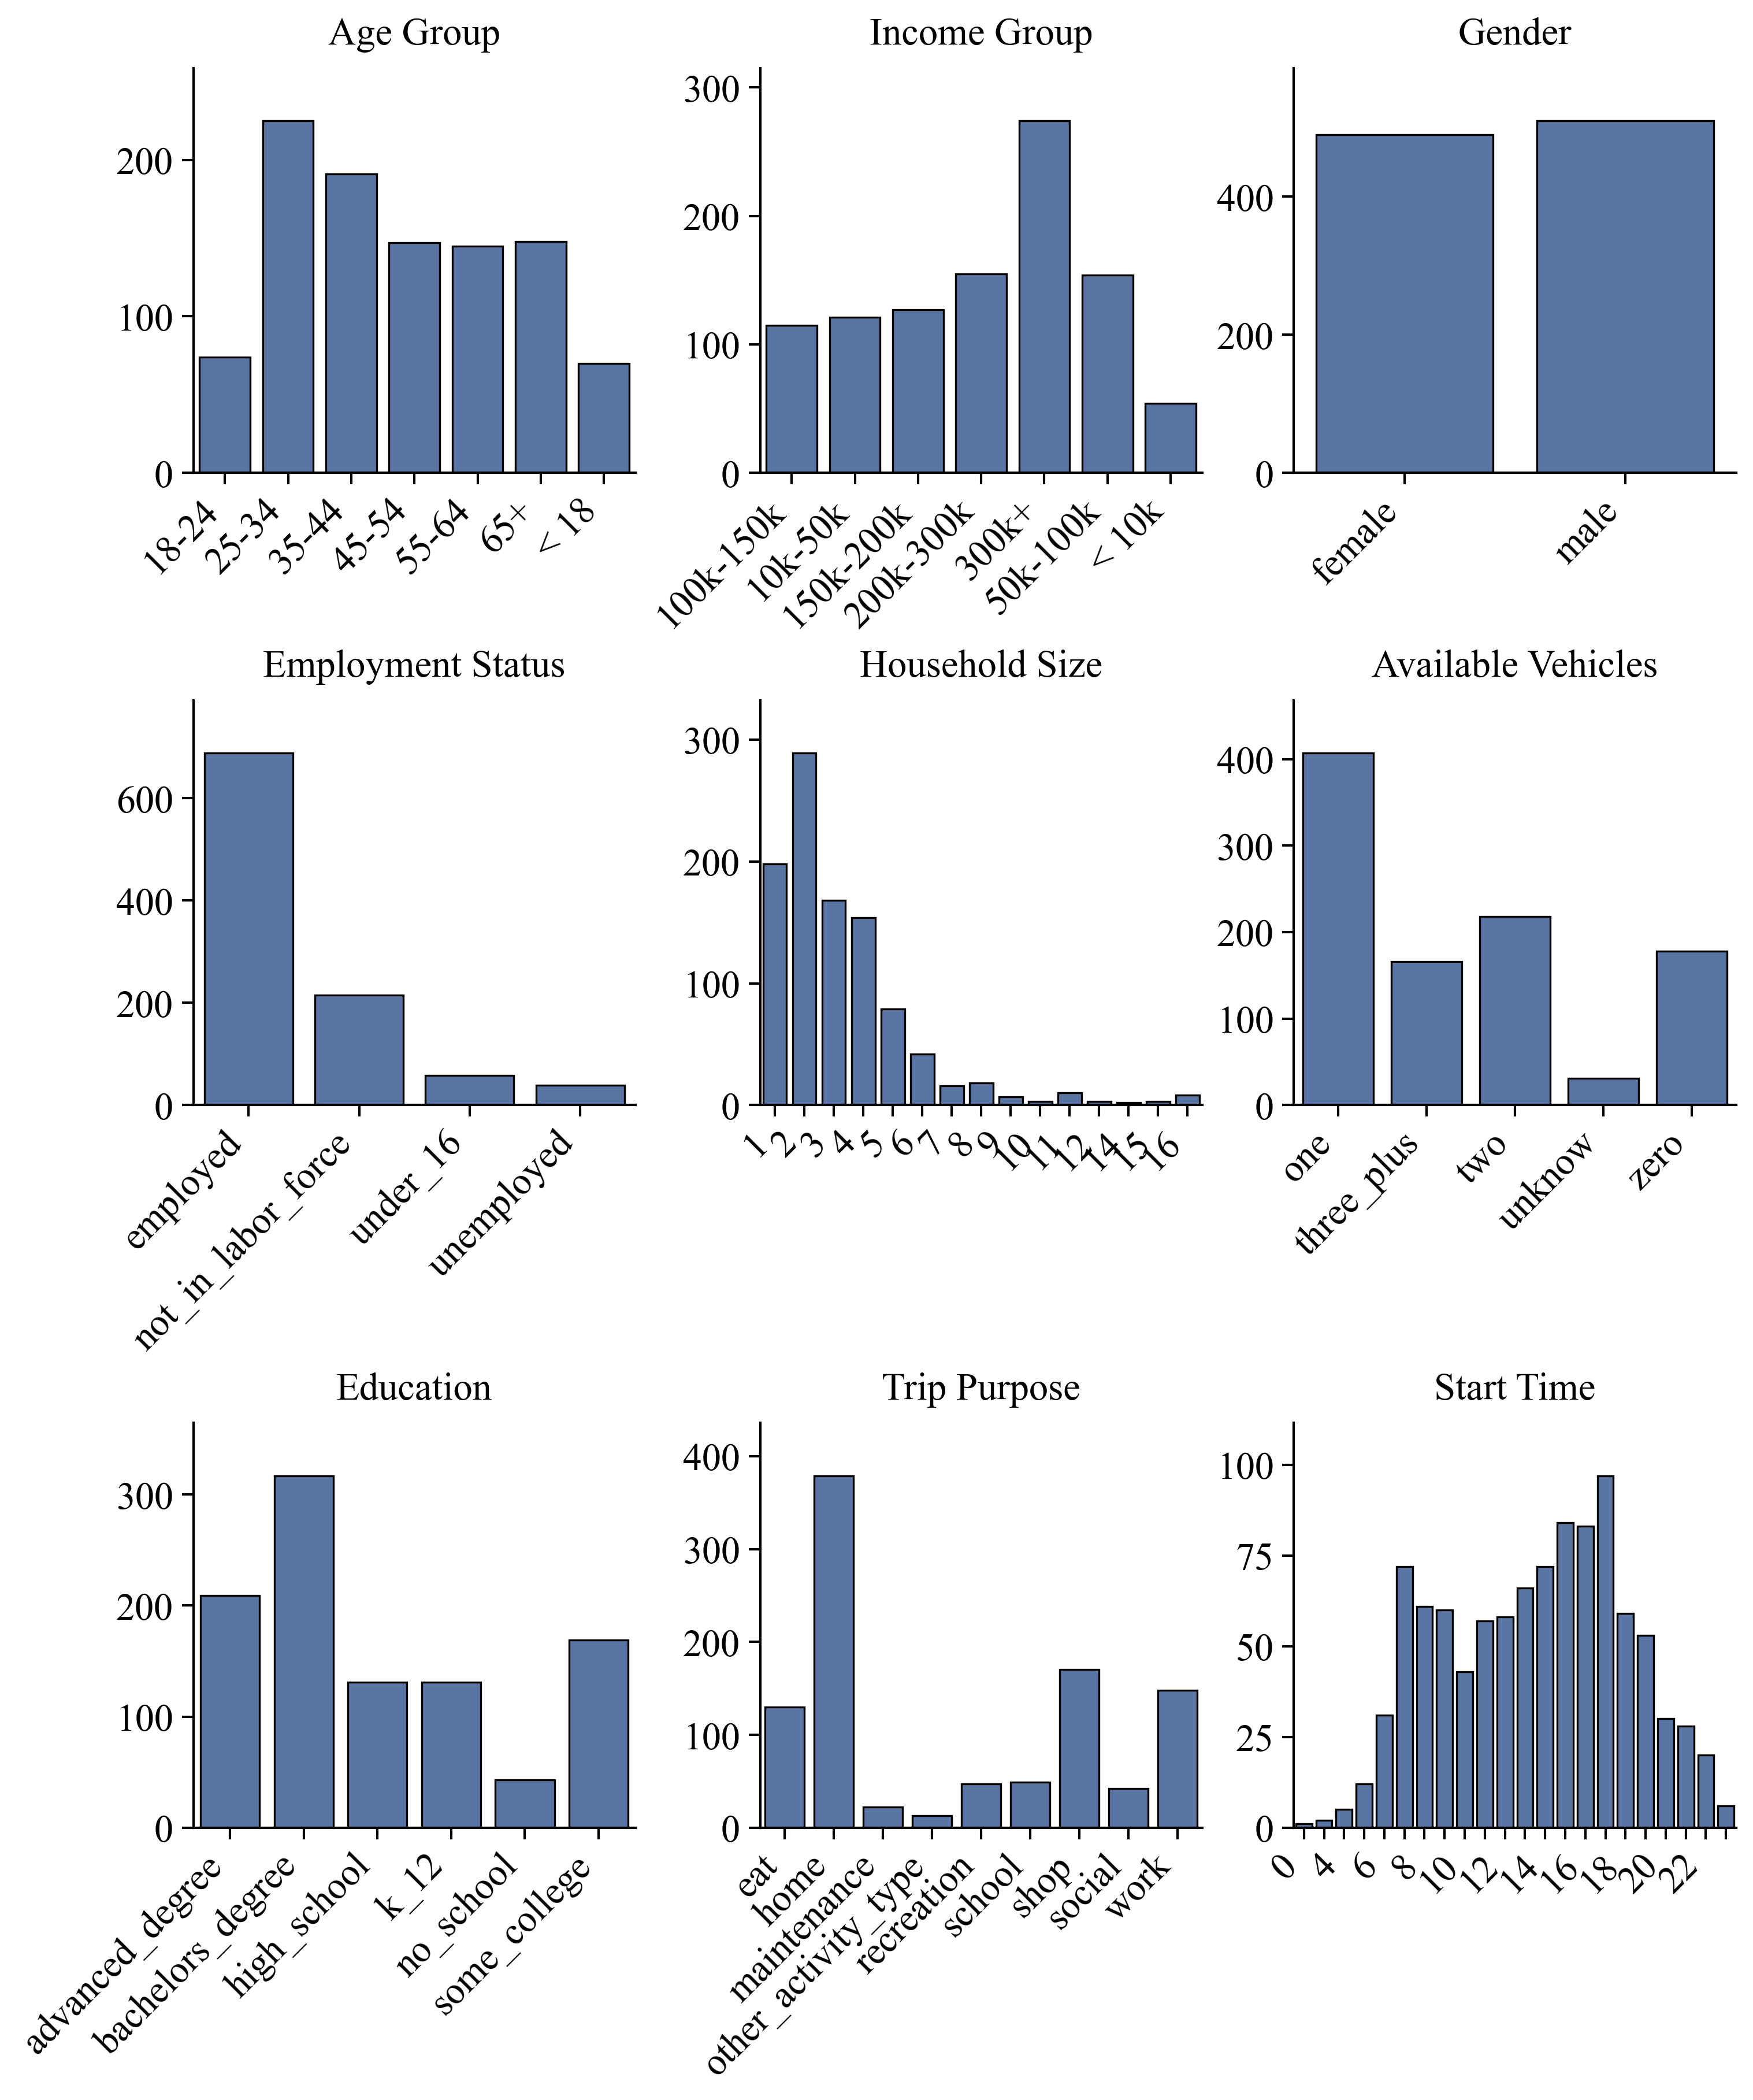

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置学术风格的图表参数
# plt.style.use('seaborn-v0_8-whitegrid')

data_df = sf_df.copy()

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': False,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'figure.titlesize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True
})

sns.set_context("paper", font_scale=1.8)

# 创建图表
fig, axes = plt.subplots(3,3, figsize=(10, 12), constrained_layout=True)
axes = axes.flatten()

# 设置统一的颜色 - 选择学术风格的蓝色
UNIFIED_COLOR = '#4C72B0'  # 适度的蓝色，学术风格
colors = ['#4C72B0', '#DD8452', '#55A868']

# 为每个分类变量创建可视化
for i, col in enumerate(plot_columns[:len(axes)]):
    # 计算分布
    value_counts = data_df[col].value_counts().sort_index()
    
    # 创建条形图 - 使用统一颜色
    ax = axes[i]
    bars = sns.barplot(x=value_counts.index, y=value_counts.values,
                       ax=ax, color=UNIFIED_COLOR,edgecolor='black',linewidth=0.8)
    
    # 添加数值标签
    # for p in bars.patches:
    #     ax.annotate(f'{int(p.get_height())}', 
    #                (p.get_x() + p.get_width() / 2., p.get_height()),
    #                ha='center', va='bottom',
    #                fontsize=10, xytext=(0, 2),
    #                textcoords='offset points')
    
    # 设置标题和标签
    ax.set_title(f'{col.replace("_", " ").title()}', pad=10, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # 旋转x轴标签
    plt.setp( ax.get_xticklabels(), rotation=45, ha='right')
    # Get the text from each label, replace "$" character, and set back
    labels = [item.get_text().replace("$", "").replace("Under","<").replace("unknown_num_vehicles","unknow") for item in ax.get_xticklabels()]
    if i == 8:
        # ax.set_xticklabels([x for i,x in enumerate(labels) if i%2==0 else ""])
        ax.set_xticklabels([x if i%2==0 else "" for i,x in enumerate(labels)])
    else:
        ax.set_xticklabels(labels)
    
    # 移除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加网格线(仅y轴方向)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    
    # 调整y轴范围
    ax.set_ylim(0, value_counts.max() * 1.15)

# 显示图表
plt.show()

/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_83504/2553723865.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/86/ktfv26rd0f50ycx_9731vqhh0000gn/T/ipykernel_83504/2553723865.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


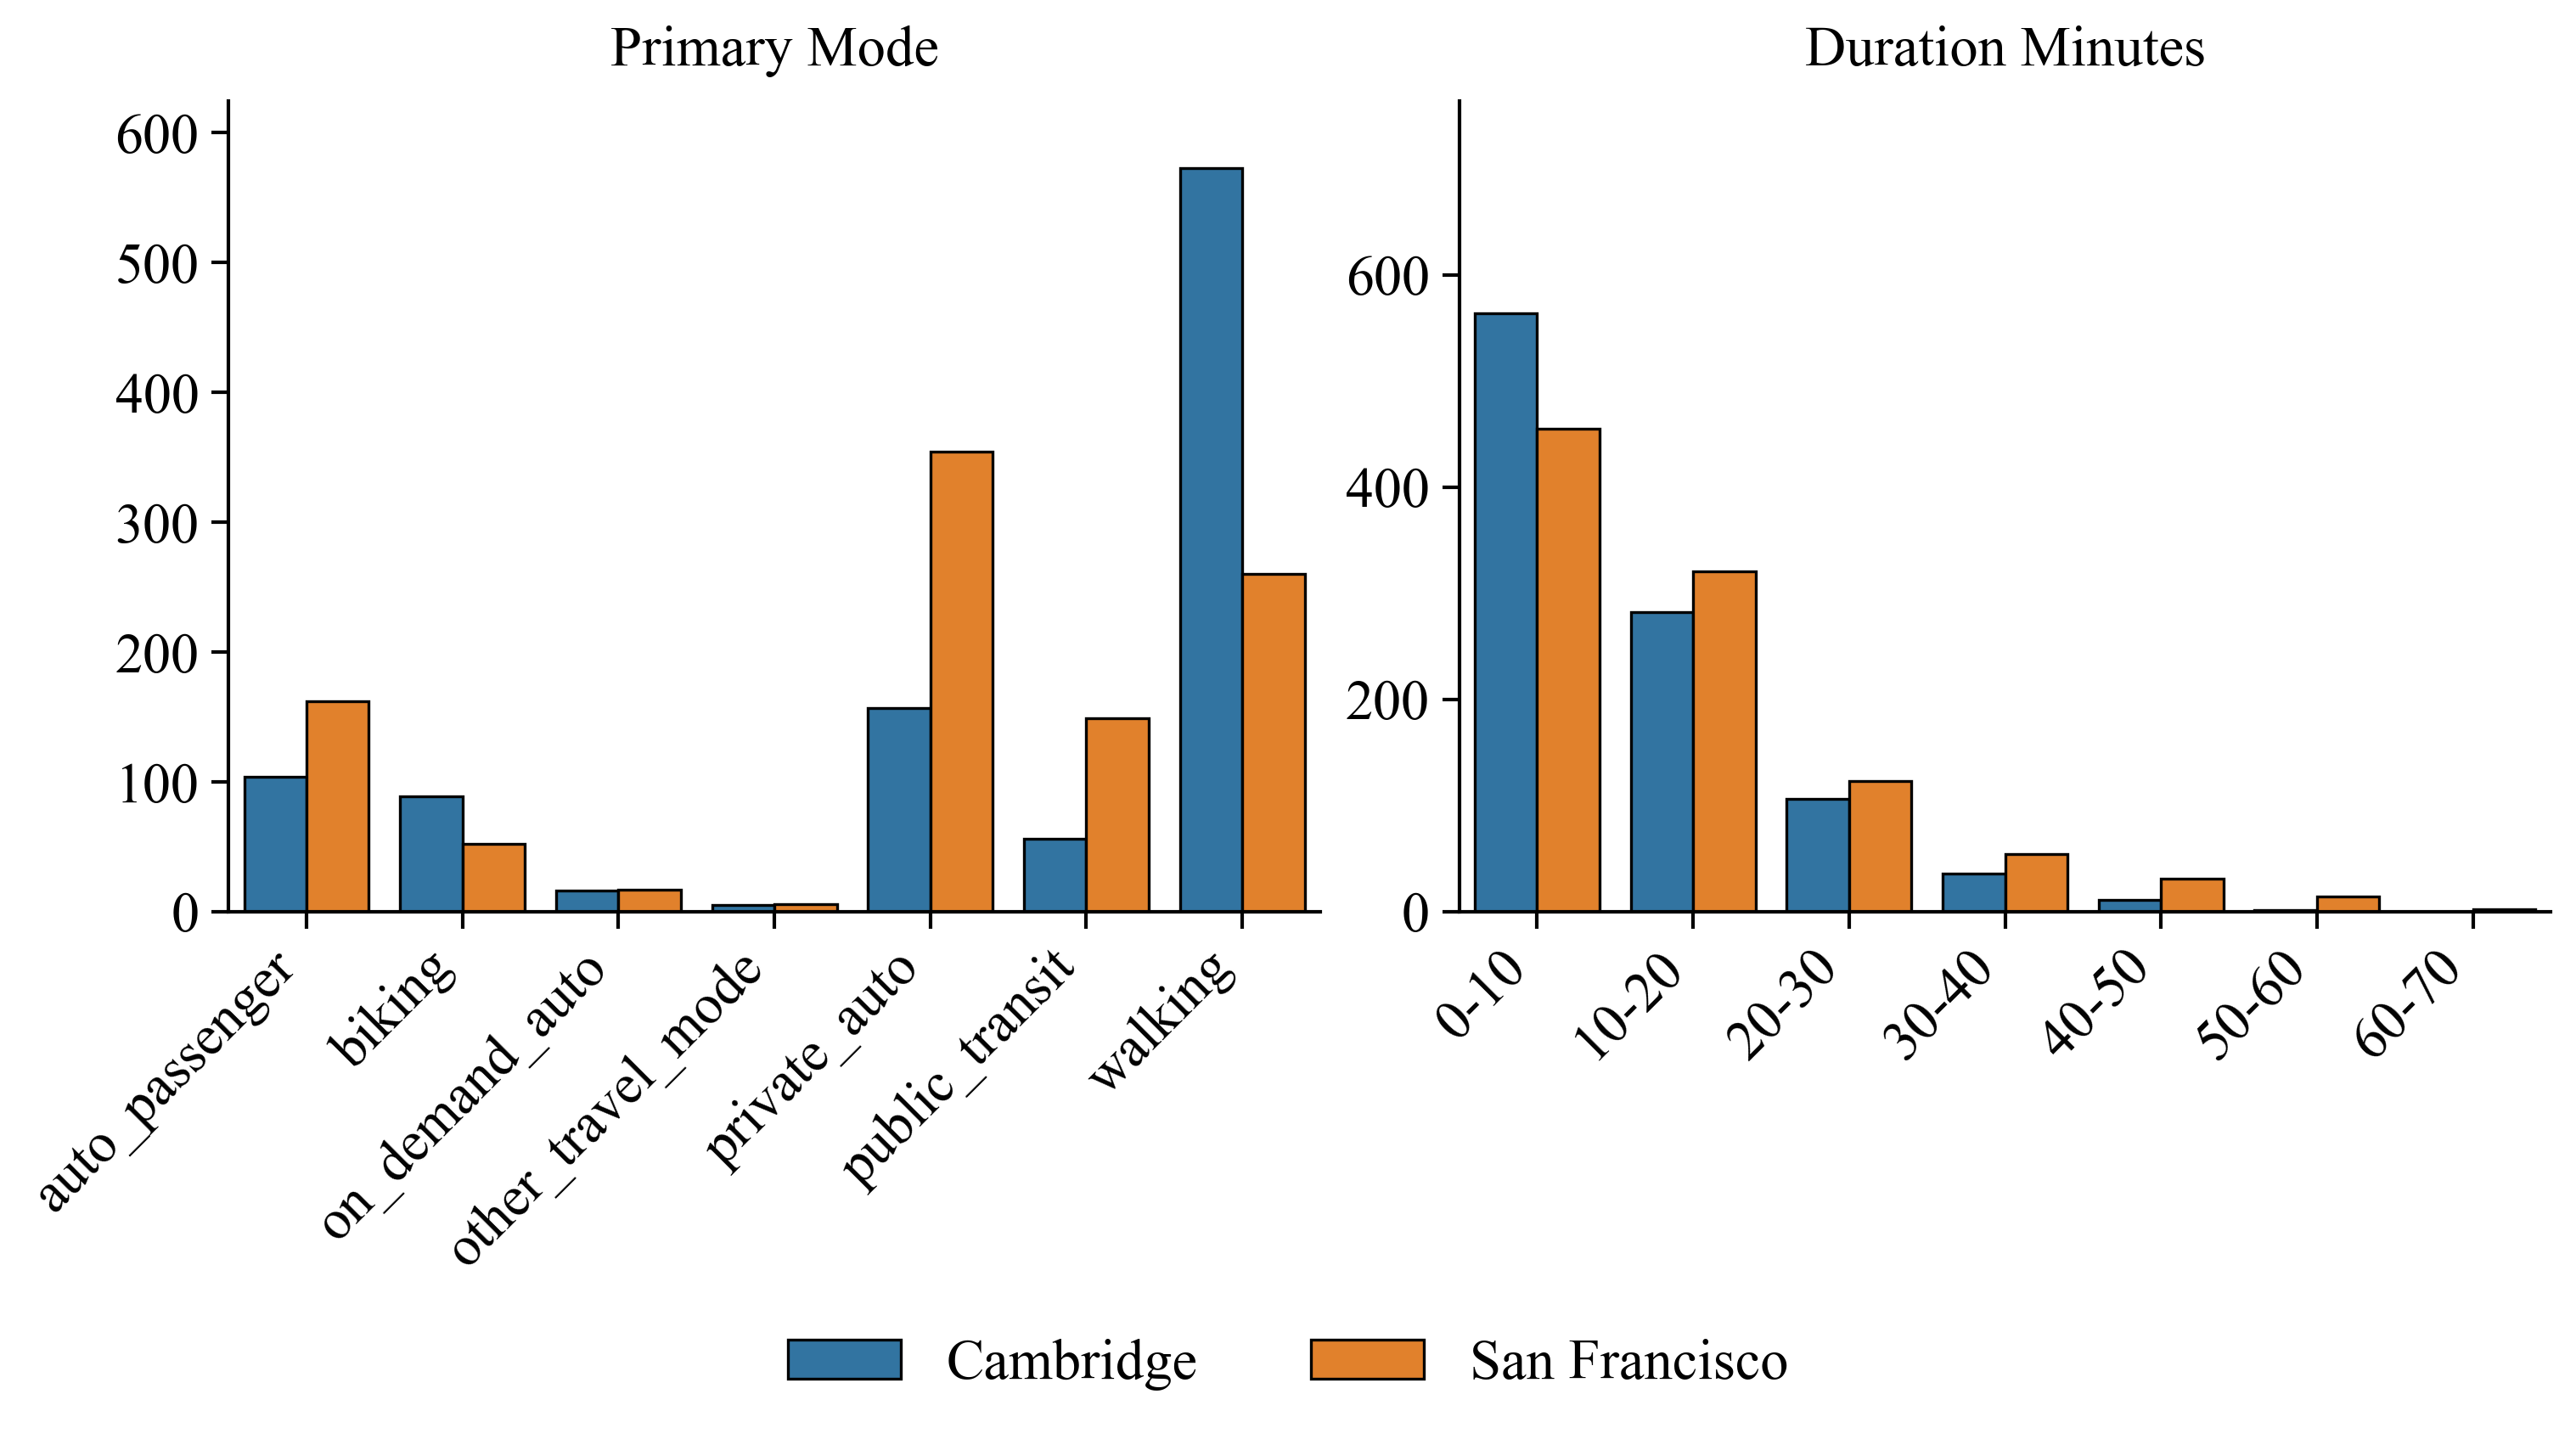

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置学术风格的图表参数
# plt.style.use('seaborn-v0_8-whitegrid')

data_df = merged_df.copy()

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': False,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'figure.titlesize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True
})

sns.set_context("paper", font_scale=1.8)

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
axes = axes.flatten()

# 设置统一的颜色 - 选择学术风格的蓝色
UNIFIED_COLOR = '#4C72B0'  # 适度的蓝色，学术风格
colors = ['#4C72B0', '#DD8452', '#55A868']

# 为每个分类变量创建可视化
for i, col in enumerate(output_columns[:len(axes)]):
    # 计算分布
    value_counts = data_df[col].value_counts().sort_index()
    
    # 创建条形图 - 使用统一颜色
    ax = axes[i]
    # bars = sns.barplot(x=value_counts.index, y=value_counts.values,
    #                    ax=ax, color=UNIFIED_COLOR,edgecolor='black',linewidth=0.8)
    
    bars = sns.countplot(data_df, x=col, hue='city', ax=ax, edgecolor='black',linewidth=0.8, order=value_counts.index)
    
    # 添加数值标签
    # for p in bars.patches:
    #     ax.annotate(f'{int(p.get_height())}', 
    #                (p.get_x() + p.get_width() / 2., p.get_height()),
    #                ha='center', va='bottom',
    #                fontsize=10, xytext=(0, 2),
    #                textcoords='offset points')
    
    # 设置标题和标签
    ax.set_title(f'{col.replace("_", " ").title()}', pad=10, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # 旋转x轴标签
    plt.setp( ax.get_xticklabels(), rotation=45, ha='right')
    # Get the text from each label, replace "$" character, and set back
    labels = [item.get_text().replace("$", "").replace("Under","<").replace("unknown_num_vehicles","unknow") for item in ax.get_xticklabels()]
    if i == 8:
        # ax.set_xticklabels([x for i,x in enumerate(labels) if i%2==0 else ""])
        ax.set_xticklabels([x if i%2==0 else "" for i,x in enumerate(labels)])
    else:
        ax.set_xticklabels(labels)
    
    # 移除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加网格线(仅y轴方向)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    
    # 调整y轴范围
    ax.set_ylim(0, value_counts.max() * 0.75)
    # ax.set_ylim(0, value_counts.max() * 1.15)

# 获取第一个子图的图例句柄和标签
handles, labels = axes[0].get_legend_handles_labels()

# 移除第一个子图的图例
for ax in axes:
    ax.get_legend().remove()

# 在整个图形上方添加统一的图例
fig.legend(handles, labels, loc='upper center', 
           bbox_to_anchor=(0.5, 0),  # 调整位置
           ncol=len(labels),  # 水平排列
           frameon=False,  # 无边框
           fontsize=16)  # 字体大小

# 显示图表
plt.show()